In [ ]:
import pandas as pd

In [20]:
import pandas as pd

url = "https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)
df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50110288,BAR BRUNO,Brooklyn,560,MANHATTAN AVENUE,11222.0,9177235743,Mexican,10/27/2024,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.722414,-73.949994,301.0,33.0,56900.0,3066749.0,3.026800e+09,BK76,NaN
1,41491686,JOSE SEAFOOD,Queens,8104,ROOSEVELT AVENUE,11372.0,6467407130,Seafood,01/09/2025,Violations were cited in the following area(s).,...,Cycle Inspection / Re-inspection,40.747537,-73.884687,404.0,25.0,26901.0,4036861.0,4.014920e+09,QN29,NaN
2,50121654,WESTVILLE,Manhattan,88,7 AVENUE,10011.0,2129242223,American,02/05/2024,Violations were cited in the following area(s).,...,Pre-permit (Operational) / Initial Inspection,40.739561,-73.998957,104.0,3.0,8100.0,1013775.0,1.007650e+09,MN13,NaN
3,50064637,MCDONALD'S,Bronx,925,HUNTS POINT AVENUE,10459.0,7182158275,Hamburgers,05/19/2025,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.820427,-73.890985,202.0,17.0,8900.0,2005886.0,2.027350e+09,BX27,NaN
4,50125519,COMMON ADDRESS,Manhattan,305,WEST 60 STREET,10023.0,2672658213,Coffee/Tea,12/28/2023,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.772610,-73.990941,107.0,6.0,15100.0,1088869.0,1.011718e+09,MN14,NaN


In [21]:
#Saving a local copy of dataset:
df.to_csv("nyc_restaurant_inspections.csv", index=False)

### 1. Loading the dataset from Local

In [22]:
#Reading data from local file now:
import pandas as pd
df = pd.read_csv("nyc_restaurant_inspections.csv")

In [23]:
print(df.shape) #283K Rows, 27 Columns.

(283693, 27)


In [24]:
print(df.columns)

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA', 'Location Point1'],
      dtype='object')


In [25]:
df.info() #To see column names, non-null counts, data type, memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283693 entries, 0 to 283692
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  283693 non-null  int64  
 1   DBA                    283689 non-null  object 
 2   BORO                   283693 non-null  object 
 3   BUILDING               283388 non-null  object 
 4   STREET                 283688 non-null  object 
 5   ZIPCODE                280877 non-null  float64
 6   PHONE                  283684 non-null  object 
 7   CUISINE DESCRIPTION    280635 non-null  object 
 8   INSPECTION DATE        283693 non-null  object 
 9   ACTION                 280635 non-null  object 
 10  VIOLATION CODE         278730 non-null  object 
 11  VIOLATION DESCRIPTION  278730 non-null  object 
 12  CRITICAL FLAG          283693 non-null  object 
 13  SCORE                  268844 non-null  float64
 14  GRADE                  138420 non-nu

In [26]:
#To check for missing values:
df.isnull().sum().sort_values(ascending=False)

Location Point1          283693
GRADE DATE               154352
GRADE                    145273
SCORE                     14849
VIOLATION CODE             4963
VIOLATION DESCRIPTION      4963
BIN                        4735
Community Board            3363
NTA                        3363
Census Tract               3340
Council District           3340
ACTION                     3058
CUISINE DESCRIPTION        3058
INSPECTION TYPE            3058
ZIPCODE                    2816
BBL                         552
Latitude                    368
Longitude                   368
BUILDING                    305
PHONE                         9
STREET                        5
DBA                           4
CAMIS                         0
INSPECTION DATE               0
BORO                          0
RECORD DATE                   0
CRITICAL FLAG                 0
dtype: int64

In [27]:
print(df.describe())

              CAMIS        ZIPCODE          SCORE       Latitude  \
count  2.836930e+05  280877.000000  268844.000000  283325.000000   
mean   4.787590e+07   10706.821036      24.315759      40.323326   
std    3.864796e+06     594.665619      18.256669       4.037119   
min    3.007544e+07    8512.000000       0.000000       0.000000   
25%    5.000020e+07   10023.000000      12.000000      40.684884   
50%    5.008253e+07   11101.000000      20.000000      40.731394   
75%    5.012002e+07   11231.000000      32.000000      40.761126   
max    5.017080e+07   28217.000000     168.000000      40.912822   

           Longitude  Community Board  Council District   Census Tract  \
count  283325.000000    280330.000000     280353.000000  280353.000000   
mean      -73.207829       254.946410         20.726106   29716.582701   
std         7.328830       130.232816         15.761379   31161.067901   
min       -74.249101       101.000000          1.000000     100.000000   
25%       -73.988

### 2. Exploratory Data Analysis:

In [28]:
print(df.shape)           # Rows, columns
print(df.info())          # Dtypes, nulls
print(df.head())          # First few rows
print(df.columns)         # Column names

(283693, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283693 entries, 0 to 283692
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  283693 non-null  int64  
 1   DBA                    283689 non-null  object 
 2   BORO                   283693 non-null  object 
 3   BUILDING               283388 non-null  object 
 4   STREET                 283688 non-null  object 
 5   ZIPCODE                280877 non-null  float64
 6   PHONE                  283684 non-null  object 
 7   CUISINE DESCRIPTION    280635 non-null  object 
 8   INSPECTION DATE        283693 non-null  object 
 9   ACTION                 280635 non-null  object 
 10  VIOLATION CODE         278730 non-null  object 
 11  VIOLATION DESCRIPTION  278730 non-null  object 
 12  CRITICAL FLAG          283693 non-null  object 
 13  SCORE                  268844 non-null  float64
 14  GRADE                  

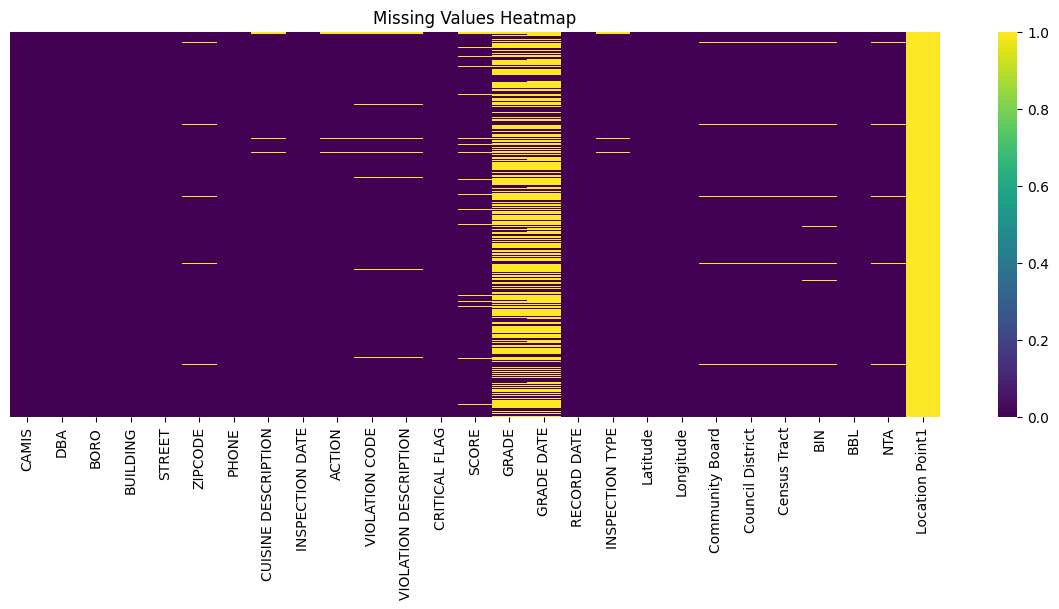

In [29]:
"""
- Showing missing values as colored bars, A chart that shows which columns have missing data and how many rows are affected — a super visual way to spot messy data instantly!
- cmap: viridis -> to show purple-green color scheme,
- 
"""

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [30]:
df.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA', 'Location Point1'],
      dtype='object')

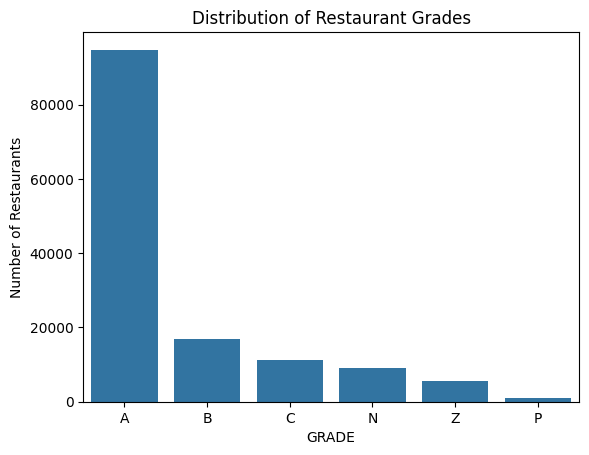

In [31]:
#Checking Grade Distribution:
"""
- CountPlot: Seaborn function that creates a bar plot showing the count of each unique value in a column,
- plotting 'Grade' column on the x-axis.
- order=df['GRADE'].value_counts().index: to sort the bars by frequency

"""
sns.countplot(data=df, x='GRADE', order=df['GRADE'].value_counts().index)
plt.title("Distribution of Restaurant Grades")
plt.xlabel("GRADE")
plt.ylabel("Number of Restaurants")
plt.show()

In [32]:
df['GRADE'].value_counts()

GRADE
A    94836
B    16794
C    11205
N     9083
Z     5583
P      919
Name: count, dtype: int64

C:\Users\priya\AppData\Local\Temp\ipykernel_10944\889113868.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='GRADE', order=df['GRADE'].value_counts().index, palette='pastel')


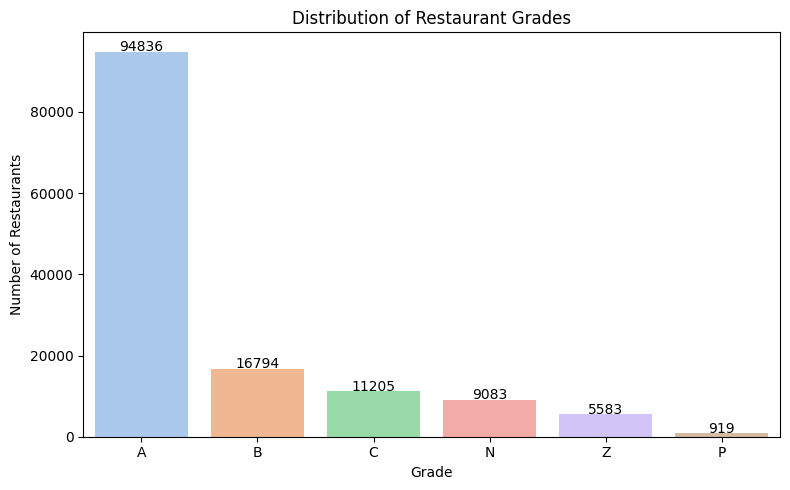

In [33]:
"""
- To showcase count of all Grades on top of the chart
    - ax.patches gives you all the bars in the plot.
    - p.get_height() gets the height of each bar (i.e., the count).
    - ax.text(...) places the number just above the bar.
"""


import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='GRADE', order=df['GRADE'].value_counts().index, palette='pastel')

# Add text labels on top of each bar
for p in ax.patches:
    height = p.get_height() # height = count of that bar
    ax.text(p.get_x() + p.get_width()/2., height + 100,  # adjust vertical spacing if needed. # y-position: slightly above the bar
            int(height), ha="center", fontsize=10) # the actual count text

# Add labels and title
plt.title("Distribution of Restaurant Grades")
plt.xlabel("Grade")
plt.ylabel("Number of Restaurants")
plt.tight_layout()
plt.show()


In [34]:
# Checking Top Cuisines in NYC:

In [35]:
df.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA', 'Location Point1'],
      dtype='object')

In [36]:
df['CUISINE DESCRIPTION'].value_counts()

CUISINE DESCRIPTION
American          45112
Chinese           27353
Coffee/Tea        19993
Pizza             17171
Latin American    12220
                  ...  
Chilean              32
Czech                13
Haute Cuisine         5
Chimichurri           2
Southwestern          2
Name: count, Length: 89, dtype: int64

C:\Users\priya\AppData\Local\Temp\ipykernel_10944\3711606180.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cuisines.index, x=top_cuisines.values, palette='pastel')


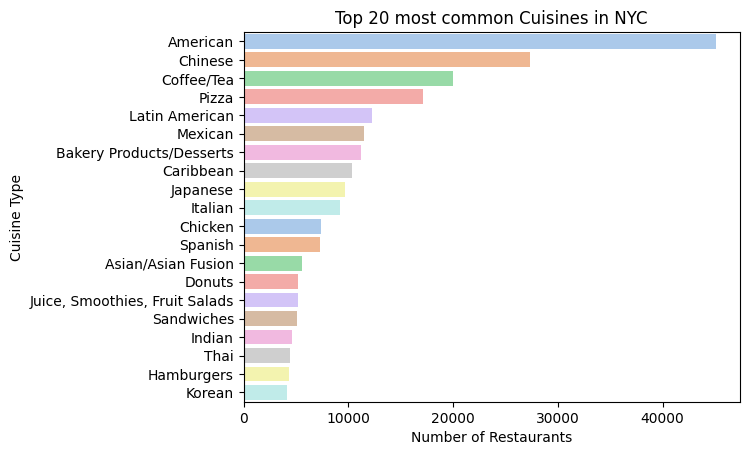

In [48]:
"""
    - barplot to use when pre-aggregated data and not using raw data directly. Works with series.
    - sns.barplot() creates a horizontal bar plot. It needs one list for y-axis and one list for x-axis.
    - top_cuisines.index = names of the cuisines like 'American','Chinese',etc. Note: top_cuisines is a pandas series.
    - top_cuisines.values = list of values showing how many restaurants serve each cuisine type.
    - .index = list of cuisine names
    - .values = list of how many restaurants serve each
    - palette='pastel' a color theme that gives your plots soft, light-toned colors instead of bold or dark shades.
    
"""

top_cuisines = df['CUISINE DESCRIPTION'].value_counts().head(20) #Creating top_cuisines pandas series
sns.barplot(y=top_cuisines.index, x=top_cuisines.values, palette='pastel')
plt.title("Top 20 most common Cuisines in NYC")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine Type")
plt.show()

In [ ]:
type(top_cuisines)

pandas.core.series.Series

In [ ]:
top_cuisines.index

Index(['American', 'Chinese', 'Coffee/Tea', 'Pizza', 'Latin American',
       'Mexican', 'Bakery Products/Desserts', 'Caribbean', 'Japanese',
       'Italian'],
      dtype='object', name='CUISINE DESCRIPTION')

In [ ]:
top_cuisines.values

array([45112, 27353, 19993, 17171, 12220, 11533, 11182, 10313,  9652,
        9246])

In [ ]:
top_cuisines

CUISINE DESCRIPTION
American                    45112
Chinese                     27353
Coffee/Tea                  19993
Pizza                       17171
Latin American              12220
Mexican                     11533
Bakery Products/Desserts    11182
Caribbean                   10313
Japanese                     9652
Italian                      9246
Name: count, dtype: int64

In [ ]:
#Violations OVer Time:

In [49]:
df.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA', 'Location Point1'],
      dtype='object')

In [54]:
df['VIOLATION DESCRIPTION'].value_counts()

VIOLATION DESCRIPTION
Non-food contact surface or equipment made of unacceptable material, not kept clean, or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.                                                                33217
Establishment is not free of harborage or conditions conducive to rodents, insects or other pests.                                                                                                                                                                                     22745
Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.                                                                                                                                         18371
Anti-siphonage or back-flow prevention device not provided where required; equipment or floor not properly drained; sewage 

In [56]:
df['INSPECTION DATE'] = pd.to_datetime(df['INSPECTION DATE'], errors='coerce')

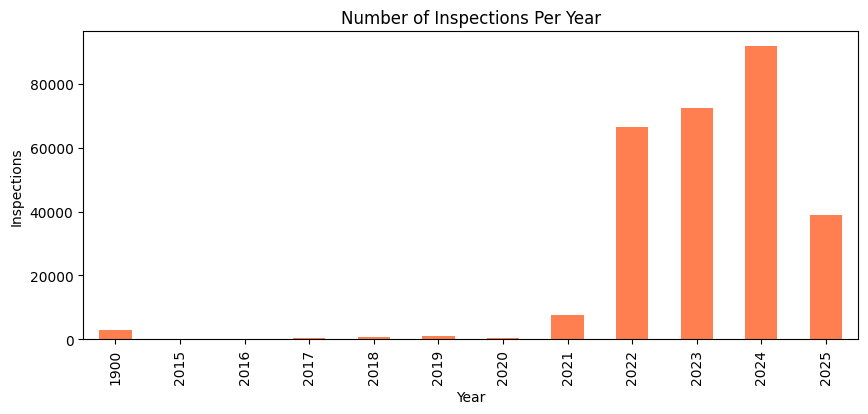

In [ ]:
"""
- Extracts the year part from the INSPECTION DATE column (which must be datetime type).
- Creates a new column 'INSPECTION YEAR' in df with just the year value (e.g., 2018, 2019).
- This lets you analyze data grouped by year.
- Groups the dataframe df by the 'INSPECTION YEAR' column.
- .size() counts the number of rows (inspections) for each year.
- Result is a Pandas Series with years as index and counts as values.

Summary:
This code extracts the year from inspection dates,
Counts inspections per year,
Then plots the count as a bar chart to visualize inspection volume over time.
"""


df['INSPECTION YEAR'] = df['INSPECTION DATE'].dt.year
yearly_violations = df.groupby('INSPECTION YEAR').size()

yearly_violations.plot(kind='bar', figsize=(10, 4), color='coral')
plt.title("Number of Inspections Per Year")
plt.xlabel("Year")
plt.ylabel("Inspections")
plt.show()


In [ ]:
#Violation Description Word Cloud:

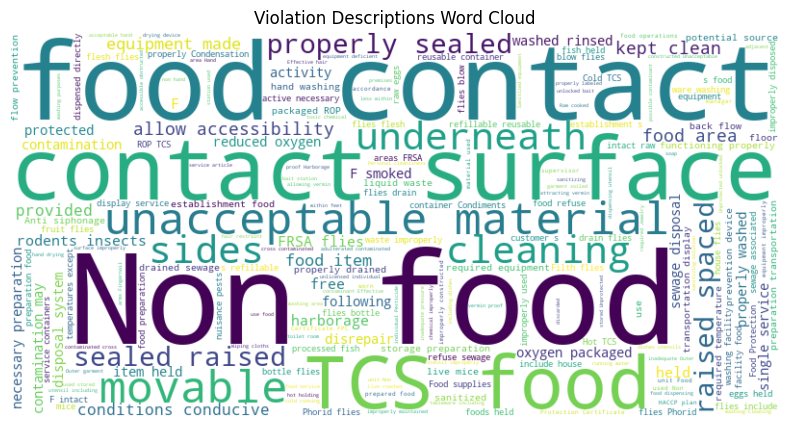

In [ ]:
"""
This code creates a visual word cloud showing the most common words in the restaurant violation descriptions, where bigger words appear more frequently in the data. It helps quickly understand common violation themes.
"""

from wordcloud import WordCloud, STOPWORDS

text = " ".join(df['VIOLATION DESCRIPTION'].dropna().astype(str))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width=800, 
                      height=400, 
                      background_color='white',
                      stopwords=stopwords).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Violation Descriptions Word Cloud")
plt.show()
